<a href="https://colab.research.google.com/github/pratik-poudel/jane-street/blob/main/6%20all_power_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download gdonchyts/jane-street-market-prediction-parquet -f train.parquet
import zipfile
zip_ref = zipfile.ZipFile('/content/train.parquet.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

 99% 1.06G/1.08G [00:47<00:00, 26.3MB/s]
100% 1.08G/1.08G [00:47<00:00, 24.1MB/s]


In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import gc
# pd.options.display.float_format| = "{:.2f}".format
pd.options.display.max_columns = 500

In [4]:
train = pd.read_parquet('/content/files/train.parquet')
train = train.query('date > 85').reset_index(drop = True) 
train = train[train['weight'] != 0]
train.shape

(1571415, 138)

In [5]:
train.fillna(train.mean(), inplace=True)

# Two Features

In [5]:
feat = [f for f in train.columns if 'feature' in f]

In [6]:
len(feat)

130

In [7]:
corr = train[feat].corrwith(train['resp']).abs().sort_values(ascending=False)

In [284]:
len(corr[corr > 0.018].index.to_list())

17

In [285]:
two_comb = []
from itertools import combinations
for i in combinations(corr[corr > 0.018].index.to_list(), 5):
    two_comb.append(list(i))

In [286]:
len(two_comb)

6188

In [287]:
from itertools import permutations,combinations_with_replacement, combinations
operators = ["+","-","*","/"]
op_list = []
for i in combinations_with_replacement(operators, 4):
    # print(i)
    op_list.append(list(i))

In [288]:
feature_names = []
for_calc = []
for i in two_comb:
    for x, j  in enumerate(op_list):

        f_calc = "df['computed_" + str(x) + "'] =" + "train[a]" + j[0] + "train[b]" + j[1] + "train[c]" + j[2] + "train[d]" + j[3] + "train[e]"
        f_name = i[0] + j[0] + i[1] + j[1] + i[2] + j[2] + i[3] + j[3] + i[4]
        a = i[0]
        b = j[0]
        c = i[1]
        d = j[1]
        e = i[2] 
        f = j[2]
        g = i[3]
        h = j[3]
        k = i[4]

        for_calc.append(f_calc)
        feature_names.append(f_name)

In [289]:
len(feature_names)

216580

In [291]:
6188*35

216580

In [293]:
%%time
from google.colab import output
score = []
count = 0
df= pd.DataFrame()
for i in two_comb:
    a = i[0]
    b = i[1]
    c = i[2]
    d = i[3]
    e = i[4]
    
    df['computed_0'] =train[a]+train[b]+train[c]+train[d]+train[e]
    df['computed_1'] =train[a]+train[b]+train[c]+train[d]-train[e]
    df['computed_2'] =train[a]+train[b]+train[c]+train[d]*train[e]
    df['computed_3'] =train[a]+train[b]+train[c]+train[d]/train[e]
    df['computed_4'] =train[a]+train[b]+train[c]-train[d]-train[e]
    df['computed_5'] =train[a]+train[b]+train[c]-train[d]*train[e]
    df['computed_6'] =train[a]+train[b]+train[c]-train[d]/train[e]
    df['computed_7'] =train[a]+train[b]+train[c]*train[d]*train[e]
    df['computed_8'] =train[a]+train[b]+train[c]*train[d]/train[e]
    df['computed_9'] =train[a]+train[b]+train[c]/train[d]/train[e]
    df['computed_10'] =train[a]+train[b]-train[c]-train[d]-train[e]
    df['computed_11'] =train[a]+train[b]-train[c]-train[d]*train[e]
    df['computed_12'] =train[a]+train[b]-train[c]-train[d]/train[e]
    df['computed_13'] =train[a]+train[b]-train[c]*train[d]*train[e]
    df['computed_14'] =train[a]+train[b]-train[c]*train[d]/train[e]
    df['computed_15'] =train[a]+train[b]-train[c]/train[d]/train[e]
    df['computed_16'] =train[a]+train[b]*train[c]*train[d]*train[e]
    df['computed_17'] =train[a]+train[b]*train[c]*train[d]/train[e]
    df['computed_18'] =train[a]+train[b]*train[c]/train[d]/train[e]
    df['computed_19'] =train[a]+train[b]/train[c]/train[d]/train[e]
    df['computed_20'] =train[a]-train[b]-train[c]-train[d]-train[e]
    df['computed_21'] =train[a]-train[b]-train[c]-train[d]*train[e]
    df['computed_22'] =train[a]-train[b]-train[c]-train[d]/train[e]
    df['computed_23'] =train[a]-train[b]-train[c]*train[d]*train[e]
    df['computed_24'] =train[a]-train[b]-train[c]*train[d]/train[e]
    df['computed_25'] =train[a]-train[b]-train[c]/train[d]/train[e]
    df['computed_26'] =train[a]-train[b]*train[c]*train[d]*train[e]
    df['computed_27'] =train[a]-train[b]*train[c]*train[d]/train[e]
    df['computed_28'] =train[a]-train[b]*train[c]/train[d]/train[e]
    df['computed_29'] =train[a]-train[b]/train[c]/train[d]/train[e]
    df['computed_30'] =train[a]*train[b]*train[c]*train[d]*train[e]
    df['computed_31'] =train[a]*train[b]*train[c]*train[d]/train[e]
    df['computed_32'] =train[a]*train[b]*train[c]/train[d]/train[e]
    df['computed_33'] =train[a]*train[b]/train[c]/train[d]/train[e]
    df['computed_34'] =train[a]/train[b]/train[c]/train[d]/train[e]

    for i in df.corrwith(train['resp']).values:
        score.append(i)
   
    count += 1
    print(count, "done out of ", len(two_comb) )
    if count % 10 ==0:
        output.clear()

6181 done out of  6188
6182 done out of  6188
6183 done out of  6188
6184 done out of  6188
6185 done out of  6188
6186 done out of  6188
6187 done out of  6188
6188 done out of  6188
CPU times: user 2h 12min 25s, sys: 6min 12s, total: 2h 18min 38s
Wall time: 1h 50min 20s


In [296]:
five_features = pd.DataFrame(zip(feature_names, score), columns=['feature', 'score'])

In [298]:
five_features['scores'] = five_features['score'].abs()

In [ ]:
five_features.sort_values(by='scores', ascending=False)[['feature', 'scores']][:25]

In [305]:
five_features.to_csv('five_features.csv', index=False)

# Ten Combinations


In [315]:
len(corr[corr > 0.022].index.to_list())

15

In [319]:
ten_combinations = []
from itertools import combinations, permutations, combinations_with_replacement
for i in combinations(corr[corr > 0.022].index.to_list(), 10):
    ten_combinations.append(list(i))
print(len(ten_combinations))

3003


In [320]:
operators = ["+","-","*","/"]
op_list = []
for i in combinations_with_replacement(operators, 9):
    # print(i)
    op_list.append(list(i))

In [321]:
for_calc = []
for i in ten_combinations[:1]:
    for x, y  in enumerate(op_list):
        f_calc = ("df['computed_" + str(x) + "'] =" + "train[a]" + y[0] + "train[b]" + y[1] + 
                  "train[c]" + y[2] + "train[d]" + y[3] + "train[e]" + y[4] + "train[f]" + 
                 y[5] + "train[g]" + y[6] + "train[h]" + y[7] + "train[i]" + y[8]+ "train[j]"
                 )
        for_calc.append(f_calc)

In [322]:
feature_names = []
for i in ten_combinations:
    for x, y  in enumerate(op_list):
        f_name = (i[0] + y[0] + i[1] + y[1] + i[2] + y[2] + i[3] + y[3] + i[4] + y[4] +
                 i[5] + y[5] + i[6] + y[6] + i[7] + y[7] + i[8] + y[8] + i[9])
        feature_names.append(f_name)
        

In [ ]:
for i in for_calc:
    print(i)

In [326]:
%%time
from google.colab import output
score = []
count = 0
df= pd.DataFrame()
for z in ten_combinations:
    a = z[0]
    b = z[1]
    c = z[2]
    d = z[3]
    e = z[4]
    f = z[5]
    g = z[6]
    h = z[7]
    i = z[8]
    j = z[9]
    
    
    df['computed_0'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]+train[i]+train[j]
    df['computed_1'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]+train[i]-train[j]
    df['computed_2'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]+train[i]*train[j]
    df['computed_3'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]+train[i]/train[j]
    df['computed_4'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]-train[i]-train[j]
    df['computed_5'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]-train[i]*train[j]
    df['computed_6'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]-train[i]/train[j]
    df['computed_7'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]*train[i]*train[j]
    df['computed_8'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]*train[i]/train[j]
    df['computed_9'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]+train[h]/train[i]/train[j]
    df['computed_10'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]-train[h]-train[i]-train[j]
    df['computed_11'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]-train[h]-train[i]*train[j]
    df['computed_12'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]-train[h]-train[i]/train[j]
    df['computed_13'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]-train[h]*train[i]*train[j]
    df['computed_14'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]-train[h]*train[i]/train[j]
    df['computed_15'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]-train[h]/train[i]/train[j]
    df['computed_16'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]*train[h]*train[i]*train[j]
    df['computed_17'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]*train[h]*train[i]/train[j]
    df['computed_18'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]*train[h]/train[i]/train[j]
    df['computed_19'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]+train[g]/train[h]/train[i]/train[j]
    df['computed_20'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]-train[h]-train[i]-train[j]
    df['computed_21'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]-train[h]-train[i]*train[j]
    df['computed_22'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]-train[h]-train[i]/train[j]
    df['computed_23'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]-train[h]*train[i]*train[j]
    df['computed_24'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]-train[h]*train[i]/train[j]
    df['computed_25'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]-train[h]/train[i]/train[j]
    df['computed_26'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]*train[h]*train[i]*train[j]
    df['computed_27'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]*train[h]*train[i]/train[j]
    df['computed_28'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]*train[h]/train[i]/train[j]
    df['computed_29'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]-train[g]/train[h]/train[i]/train[j]
    df['computed_30'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_31'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_32'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_33'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_34'] =train[a]+train[b]+train[c]+train[d]+train[e]+train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_35'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]-train[h]-train[i]-train[j]
    df['computed_36'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]-train[h]-train[i]*train[j]
    df['computed_37'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]-train[h]-train[i]/train[j]
    df['computed_38'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]-train[h]*train[i]*train[j]
    df['computed_39'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]-train[h]*train[i]/train[j]
    df['computed_40'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]-train[h]/train[i]/train[j]
    df['computed_41'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]*train[h]*train[i]*train[j]
    df['computed_42'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]*train[h]*train[i]/train[j]
    df['computed_43'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]*train[h]/train[i]/train[j]
    df['computed_44'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]-train[g]/train[h]/train[i]/train[j]
    df['computed_45'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_46'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_47'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_48'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_49'] =train[a]+train[b]+train[c]+train[d]+train[e]-train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_50'] =train[a]+train[b]+train[c]+train[d]+train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_51'] =train[a]+train[b]+train[c]+train[d]+train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_52'] =train[a]+train[b]+train[c]+train[d]+train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_53'] =train[a]+train[b]+train[c]+train[d]+train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_54'] =train[a]+train[b]+train[c]+train[d]+train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_55'] =train[a]+train[b]+train[c]+train[d]+train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_56'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]-train[h]-train[i]-train[j]
    df['computed_57'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]-train[h]-train[i]*train[j]
    df['computed_58'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]-train[h]-train[i]/train[j]
    df['computed_59'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]-train[h]*train[i]*train[j]
    df['computed_60'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]-train[h]*train[i]/train[j]
    df['computed_61'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]-train[h]/train[i]/train[j]
    df['computed_62'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]*train[h]*train[i]*train[j]
    df['computed_63'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]*train[h]*train[i]/train[j]
    df['computed_64'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]*train[h]/train[i]/train[j]
    df['computed_65'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]-train[g]/train[h]/train[i]/train[j]
    df['computed_66'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_67'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_68'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_69'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_70'] =train[a]+train[b]+train[c]+train[d]-train[e]-train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_71'] =train[a]+train[b]+train[c]+train[d]-train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_72'] =train[a]+train[b]+train[c]+train[d]-train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_73'] =train[a]+train[b]+train[c]+train[d]-train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_74'] =train[a]+train[b]+train[c]+train[d]-train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_75'] =train[a]+train[b]+train[c]+train[d]-train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_76'] =train[a]+train[b]+train[c]+train[d]-train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_77'] =train[a]+train[b]+train[c]+train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_78'] =train[a]+train[b]+train[c]+train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_79'] =train[a]+train[b]+train[c]+train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_80'] =train[a]+train[b]+train[c]+train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_81'] =train[a]+train[b]+train[c]+train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_82'] =train[a]+train[b]+train[c]+train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_83'] =train[a]+train[b]+train[c]+train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_84'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]-train[j]
    df['computed_85'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]*train[j]
    df['computed_86'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]/train[j]
    df['computed_87'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]-train[h]*train[i]*train[j]
    df['computed_88'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]-train[h]*train[i]/train[j]
    df['computed_89'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]-train[h]/train[i]/train[j]
    df['computed_90'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]*train[h]*train[i]*train[j]
    df['computed_91'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]*train[h]*train[i]/train[j]
    df['computed_92'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]*train[h]/train[i]/train[j]
    df['computed_93'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]-train[g]/train[h]/train[i]/train[j]
    df['computed_94'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_95'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_96'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_97'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_98'] =train[a]+train[b]+train[c]-train[d]-train[e]-train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_99'] =train[a]+train[b]+train[c]-train[d]-train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_100'] =train[a]+train[b]+train[c]-train[d]-train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_101'] =train[a]+train[b]+train[c]-train[d]-train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_102'] =train[a]+train[b]+train[c]-train[d]-train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_103'] =train[a]+train[b]+train[c]-train[d]-train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_104'] =train[a]+train[b]+train[c]-train[d]-train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_105'] =train[a]+train[b]+train[c]-train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_106'] =train[a]+train[b]+train[c]-train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_107'] =train[a]+train[b]+train[c]-train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_108'] =train[a]+train[b]+train[c]-train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_109'] =train[a]+train[b]+train[c]-train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_110'] =train[a]+train[b]+train[c]-train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_111'] =train[a]+train[b]+train[c]-train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_112'] =train[a]+train[b]+train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_113'] =train[a]+train[b]+train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_114'] =train[a]+train[b]+train[c]*train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_115'] =train[a]+train[b]+train[c]*train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_116'] =train[a]+train[b]+train[c]*train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_117'] =train[a]+train[b]+train[c]*train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_118'] =train[a]+train[b]+train[c]*train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_119'] =train[a]+train[b]+train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_120'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]-train[j]
    df['computed_121'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]*train[j]
    df['computed_122'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]/train[j]
    df['computed_123'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]*train[i]*train[j]
    df['computed_124'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]*train[i]/train[j]
    df['computed_125'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]/train[i]/train[j]
    df['computed_126'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]*train[h]*train[i]*train[j]
    df['computed_127'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]*train[h]*train[i]/train[j]
    df['computed_128'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]*train[h]/train[i]/train[j]
    df['computed_129'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]-train[g]/train[h]/train[i]/train[j]
    df['computed_130'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_131'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_132'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_133'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_134'] =train[a]+train[b]-train[c]-train[d]-train[e]-train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_135'] =train[a]+train[b]-train[c]-train[d]-train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_136'] =train[a]+train[b]-train[c]-train[d]-train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_137'] =train[a]+train[b]-train[c]-train[d]-train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_138'] =train[a]+train[b]-train[c]-train[d]-train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_139'] =train[a]+train[b]-train[c]-train[d]-train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_140'] =train[a]+train[b]-train[c]-train[d]-train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_141'] =train[a]+train[b]-train[c]-train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_142'] =train[a]+train[b]-train[c]-train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_143'] =train[a]+train[b]-train[c]-train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_144'] =train[a]+train[b]-train[c]-train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_145'] =train[a]+train[b]-train[c]-train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_146'] =train[a]+train[b]-train[c]-train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_147'] =train[a]+train[b]-train[c]-train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_148'] =train[a]+train[b]-train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_149'] =train[a]+train[b]-train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_150'] =train[a]+train[b]-train[c]*train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_151'] =train[a]+train[b]-train[c]*train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_152'] =train[a]+train[b]-train[c]*train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_153'] =train[a]+train[b]-train[c]*train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_154'] =train[a]+train[b]-train[c]*train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_155'] =train[a]+train[b]-train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_156'] =train[a]+train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_157'] =train[a]+train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_158'] =train[a]+train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_159'] =train[a]+train[b]*train[c]*train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_160'] =train[a]+train[b]*train[c]*train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_161'] =train[a]+train[b]*train[c]*train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_162'] =train[a]+train[b]*train[c]*train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_163'] =train[a]+train[b]*train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_164'] =train[a]+train[b]/train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_165'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]-train[j]
    df['computed_166'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]*train[j]
    df['computed_167'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]-train[i]/train[j]
    df['computed_168'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]*train[i]*train[j]
    df['computed_169'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]*train[i]/train[j]
    df['computed_170'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]-train[h]/train[i]/train[j]
    df['computed_171'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]*train[h]*train[i]*train[j]
    df['computed_172'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]*train[h]*train[i]/train[j]
    df['computed_173'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]*train[h]/train[i]/train[j]
    df['computed_174'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]-train[g]/train[h]/train[i]/train[j]
    df['computed_175'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_176'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_177'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_178'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_179'] =train[a]-train[b]-train[c]-train[d]-train[e]-train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_180'] =train[a]-train[b]-train[c]-train[d]-train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_181'] =train[a]-train[b]-train[c]-train[d]-train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_182'] =train[a]-train[b]-train[c]-train[d]-train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_183'] =train[a]-train[b]-train[c]-train[d]-train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_184'] =train[a]-train[b]-train[c]-train[d]-train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_185'] =train[a]-train[b]-train[c]-train[d]-train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_186'] =train[a]-train[b]-train[c]-train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_187'] =train[a]-train[b]-train[c]-train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_188'] =train[a]-train[b]-train[c]-train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_189'] =train[a]-train[b]-train[c]-train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_190'] =train[a]-train[b]-train[c]-train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_191'] =train[a]-train[b]-train[c]-train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_192'] =train[a]-train[b]-train[c]-train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_193'] =train[a]-train[b]-train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_194'] =train[a]-train[b]-train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_195'] =train[a]-train[b]-train[c]*train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_196'] =train[a]-train[b]-train[c]*train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_197'] =train[a]-train[b]-train[c]*train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_198'] =train[a]-train[b]-train[c]*train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_199'] =train[a]-train[b]-train[c]*train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_200'] =train[a]-train[b]-train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_201'] =train[a]-train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_202'] =train[a]-train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_203'] =train[a]-train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_204'] =train[a]-train[b]*train[c]*train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_205'] =train[a]-train[b]*train[c]*train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_206'] =train[a]-train[b]*train[c]*train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_207'] =train[a]-train[b]*train[c]*train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_208'] =train[a]-train[b]*train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_209'] =train[a]-train[b]/train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_210'] =train[a]*train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]*train[j]
    df['computed_211'] =train[a]*train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]*train[i]/train[j]
    df['computed_212'] =train[a]*train[b]*train[c]*train[d]*train[e]*train[f]*train[g]*train[h]/train[i]/train[j]
    df['computed_213'] =train[a]*train[b]*train[c]*train[d]*train[e]*train[f]*train[g]/train[h]/train[i]/train[j]
    df['computed_214'] =train[a]*train[b]*train[c]*train[d]*train[e]*train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_215'] =train[a]*train[b]*train[c]*train[d]*train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_216'] =train[a]*train[b]*train[c]*train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_217'] =train[a]*train[b]*train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_218'] =train[a]*train[b]/train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    df['computed_219'] =train[a]/train[b]/train[c]/train[d]/train[e]/train[f]/train[g]/train[h]/train[i]/train[j]
    
    for i in df.corrwith(train['resp']).values:
        score.append(i)
    count += 1
    print(count, "done out of ", len(ten_combinations) )
    if count % 10 ==0:
        output.clear()

3001 done out of  3003
3002 done out of  3003
3003 done out of  3003
CPU times: user 9h 52min 47s, sys: 37min 5s, total: 10h 29min 52s
Wall time: 7h 19min 53s


In [327]:
ten_features = pd.DataFrame(zip(feature_names, score), columns=['feature', 'score'])

In [328]:
ten_features['scores'] = five_features['score'].abs()

In [ ]:
ten_features.sort_values(by='scores', ascending=False)[['feature', 'scores']][:25]

In [330]:
ten_features.to_csv('five_features.csv', index=False)

In [ ]:
pd.options.display.max_rows = 500
ten_features[:200]

In [333]:
ten_features = pd.read_csv('five_features.csv')

In [ ]:
ten_features.sort_values(by='scores', ascending=False)

In [337]:
np.power(train['feature_100'], 0.09)

0          0.997231
2               NaN
3               NaN
6               NaN
7               NaN
             ...   
1862550    0.957455
1862552    1.044606
1862584    0.939044
1862587         NaN
1862595    1.032051
Name: feature_100, Length: 1571415, dtype: float64

In [ ]:
train.isna().sum()

In [339]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
np.linspace(0.0001, 5, 100)

In [ ]:
df = pd.DataFrame()
for i in np.linspace(2.2, 2.6, 50):
    for f in [f'feature_{i}' for i in range(1,130)]:
        df['power_'+str(f)] = np.power(train[f], i)
    print("power : ", i, "corr == ", df.corrwith(train['resp']).abs().sort_values(ascending=False)[:2].values)

In [ ]:
np.power(train[feat], 2.526530612244898).corrwith(train['resp']).abs().sort_values(ascending=False)

In [421]:
scores = []
power = []
df = pd.DataFrame()
for i in np.linspace(0.9, 2.6, 100):
    df['power'] = np.power(train['feature_39'], i)
    # print("power : ", i, "corr == ", np.abs(df['power'].corr(train['resp'])) )
    power.append(i)
    scores.append(np.abs(df['power'].corr(train['resp'])))
res = pd.DataFrame(scores, index=power, columns=['corr'])
print(res.loc[res['corr'].idxmax()])
display(res.sort_values(by='corr', ascending=False).head(10))

corr    0.057834
Name: 2.5313131313131314, dtype: float64


,corr
2.531313,0.057834
2.548485,0.057834
2.514141,0.057831
2.565657,0.057831
2.496970,0.057827
2.582828,0.057826
2.479798,0.057819
2.600000,0.057818
2.462626,0.057809
2.445455,0.057797


In [544]:
corr[40:50]

feature_42     0.012365
feature_91     0.011558
feature_26     0.011444
feature_97     0.010965
feature_5      0.010879
feature_8      0.010841
feature_106    0.010557
feature_2      0.010423
feature_82     0.010390
feature_85     0.010340
dtype: float64

In [597]:
%%time
scores = []
power = []
df = pd.DataFrame()
for i in np.linspace(0.001,1,50):
    df['power'] = np.power(train['feature_85'], i)
    # print("power : ", i, "corr == ", np.abs(df['power'].corr(train['resp'])) )
    power.append(i)
    scores.append(np.abs(df['power'].corr(train['resp'])))
res = pd.DataFrame(scores, index=power, columns=['corr'])
print(res.loc[res['corr'].idxmax()])
display(res.sort_values(by='corr', ascending=False).head(10))

corr    0.01034
Name: 1.0, dtype: float64


,corr
1.000000,0.010340
0.001000,0.003710
0.021388,0.003662
0.041776,0.003611
0.062163,0.003556
0.082551,0.003497
0.102939,0.003436
0.123327,0.003371
0.143714,0.003305
0.164102,0.003236


CPU times: user 7.86 s, sys: 61 ms, total: 7.92 s
Wall time: 3.73 s


In [757]:
print(corr[:25].index.to_list())

['feature_39', 'feature_31', 'feature_27', 'feature_33', 'feature_35', 'feature_29', 'feature_21', 'feature_40', 'feature_37', 'feature_17', 'feature_28', 'feature_23', 'feature_32', 'feature_0', 'feature_25', 'feature_34', 'feature_38', 'feature_36', 'feature_13', 'feature_22', 'feature_1', 'feature_11', 'feature_18', 'feature_19', 'feature_7']


# POWER TRANS AND CORRELATION

In [6]:
to_keep  = ['feature_39', 'feature_31', 'feature_27', 'feature_33', 'feature_35', 'feature_29', 'feature_21', 'feature_40', 'feature_37', 'feature_17', 'feature_28', 'feature_23', 'feature_32', 'feature_0', 'feature_25', 'feature_34', 'feature_38', 'feature_36', 'feature_13', 'feature_22', 'feature_1', 'feature_11', 'feature_18', 'feature_19', 'feature_7']
df = train[to_keep]

In [7]:
df['feature_39'] = np.power(train['feature_39'],2.5313131313131314 )
df['feature_37'] = np.power(train['feature_37'], 3.850701402805611)
df['feature_17'] = np.power(train['feature_17'], 2.658291457286432)
df['feature_38'] = np.power(train['feature_38'], 5.085427135678392 )

In [8]:
import gc
gc.collect()

244

In [12]:
len(to_keep)

25

In [727]:
# df = pd.DataFrame()
# df['feature_39'] = np.power(train['feature_39'],2.5313131313131314 )
# df['feature_37'] = np.power(train['feature_37'], 3.850701402805611)
# df['feature_17'] = np.power(train['feature_17'], 2.658291457286432)
# df['feature_38'] = np.power(train['feature_38'], 5.085427135678392 )

# df['feature_31'] = train['feature_31']
# df['feature_27']= train['feature_27']
# df['feature_33']= train['feature_33']
# df['feature_35']= train['feature_35']
# df['feature_29']= train['feature_29']
# df['feature_21']= train['feature_21']
# df['feature_40']= train['feature_40']
# df['feature_38']= train['feature_38']

In [9]:
to_combine= df.columns.to_list()

In [10]:
three_comb = []
from itertools import combinations
for i in combinations(to_combine, 4):
    three_comb.append(i)

In [11]:
len(three_comb)

12650

In [13]:
from itertools import permutations,combinations_with_replacement, combinations
operators = ["+","-","*","/"]
op_list = []
for i in combinations_with_replacement(operators, 3):
    # print(i)
    op_list.append(list(i))

In [14]:
for_calc = []
for i in three_comb[:1]:
    for x, y  in enumerate(op_list):
        f_calc = ("df['computed_" + str(x) + "'] =" + "df[a]" + y[0] + "df[b]" + y[1] + 
                  "df[c]" + y[2] + "df[d]" 
                 )
        for_calc.append(f_calc)

In [15]:
len(for_calc), len(three_comb)

(20, 12650)

In [16]:
feature_names = []
for i in three_comb:
    # print(i[0])
    for x, y  in enumerate(op_list):
        f_name = (i[0] + y[0] + i[1] + y[1] + i[2] + y[2] + i[3])
        feature_names.append(f_name)

In [17]:
len(feature_names) == len(for_calc) * len(three_comb)

True

In [18]:
for i in for_calc:
    print(i)

df['computed_0'] =df[a]+df[b]+df[c]+df[d]
df['computed_1'] =df[a]+df[b]+df[c]-df[d]
df['computed_2'] =df[a]+df[b]+df[c]*df[d]
df['computed_3'] =df[a]+df[b]+df[c]/df[d]
df['computed_4'] =df[a]+df[b]-df[c]-df[d]
df['computed_5'] =df[a]+df[b]-df[c]*df[d]
df['computed_6'] =df[a]+df[b]-df[c]/df[d]
df['computed_7'] =df[a]+df[b]*df[c]*df[d]
df['computed_8'] =df[a]+df[b]*df[c]/df[d]
df['computed_9'] =df[a]+df[b]/df[c]/df[d]
df['computed_10'] =df[a]-df[b]-df[c]-df[d]
df['computed_11'] =df[a]-df[b]-df[c]*df[d]
df['computed_12'] =df[a]-df[b]-df[c]/df[d]
df['computed_13'] =df[a]-df[b]*df[c]*df[d]
df['computed_14'] =df[a]-df[b]*df[c]/df[d]
df['computed_15'] =df[a]-df[b]/df[c]/df[d]
df['computed_16'] =df[a]*df[b]*df[c]*df[d]
df['computed_17'] =df[a]*df[b]*df[c]/df[d]
df['computed_18'] =df[a]*df[b]/df[c]/df[d]
df['computed_19'] =df[a]/df[b]/df[c]/df[d]


In [19]:
%%time
from google.colab import output
score = []
count = 0

for z in three_comb:
    a = z[0]
    b = z[1]
    c = z[2]
    d = z[3]
    # e = z[4]
    # f = z[5]
    # g = z[6]
    # h = z[7]
    # i = z[8]
    # j = z[9]
    
    df['computed_0'] =df[a]+df[b]+df[c]+df[d]
    df['computed_1'] =df[a]+df[b]+df[c]-df[d]
    df['computed_2'] =df[a]+df[b]+df[c]*df[d]
    df['computed_3'] =df[a]+df[b]+df[c]/df[d]
    df['computed_4'] =df[a]+df[b]-df[c]-df[d]
    df['computed_5'] =df[a]+df[b]-df[c]*df[d]
    df['computed_6'] =df[a]+df[b]-df[c]/df[d]
    df['computed_7'] =df[a]+df[b]*df[c]*df[d]
    df['computed_8'] =df[a]+df[b]*df[c]/df[d]
    df['computed_9'] =df[a]+df[b]/df[c]/df[d]
    df['computed_10'] =df[a]-df[b]-df[c]-df[d]
    df['computed_11'] =df[a]-df[b]-df[c]*df[d]
    df['computed_12'] =df[a]-df[b]-df[c]/df[d]
    df['computed_13'] =df[a]-df[b]*df[c]*df[d]
    df['computed_14'] =df[a]-df[b]*df[c]/df[d]
    df['computed_15'] =df[a]-df[b]/df[c]/df[d]
    df['computed_16'] =df[a]*df[b]*df[c]*df[d]
    df['computed_17'] =df[a]*df[b]*df[c]/df[d]
    df['computed_18'] =df[a]*df[b]/df[c]/df[d]
    df['computed_19'] =df[a]/df[b]/df[c]/df[d]
    f = [fe for fe in df.columns if 'computed' in fe]
    for i in df[f].corrwith(train['resp']).values:
        score.append(i)
    count += 1
    print(count, "done out of ", len(three_comb) )
    if count % 10 ==0:
        output.clear()

CPU times: user 5h 1min 15s, sys: 6min 40s, total: 5h 7min 55s
Wall time: 4h 12min 31s


In [20]:
result = pd.DataFrame(zip(feature_names, score), columns=['feature', 'score'])
result['score'] = np.abs(result['score'])
result.dropna(inplace=True)

In [21]:
result

,feature,score
0,feature_39+feature_31+feature_27+feature_33,0.060844
1,feature_39+feature_31+feature_27-feature_33,0.058307
2,feature_39+feature_31+feature_27*feature_33,0.058224
3,feature_39+feature_31+feature_27/feature_33,0.019418
4,feature_39+feature_31-feature_27-feature_33,0.056263
...,...,...
252995,feature_11-feature_18/feature_19/feature_7,0.000012
252996,feature_11*feature_18*feature_19*feature_7,0.009924
252997,feature_11*feature_18*feature_19/feature_7,0.000123
252998,feature_11*feature_18/feature_19/feature_7,0.000149


In [28]:
result.sort_values(by='score', ascending=False).to_csv('12650_corr_four_power.csv', index=False)

In [29]:
pd.read_csv('/content/12650_corr_four_power.csv')[:25]

,feature,score
0,feature_39-feature_35*feature_17*feature_38,0.128258
1,feature_39+feature_35*feature_17*feature_38,0.128258
2,feature_39-feature_33*feature_17*feature_38,0.127987
3,feature_39+feature_33*feature_17*feature_38,0.127987
4,feature_39-feature_29*feature_17*feature_38,0.127875
5,feature_39+feature_29*feature_17*feature_38,0.127875
6,feature_39-feature_31*feature_17*feature_38,0.127706
7,feature_39+feature_31*feature_17*feature_38,0.127706
8,feature_39-feature_27*feature_17*feature_38,0.127344
9,feature_39+feature_27*feature_17*feature_38,0.127344


In [32]:
y= train['resp'].values
x = train['feature_39'].values

In [33]:
#define cost function
def cost_function(e):
    #y and x are already defined
    r = np.corrcoef(y,x**e) #returns correlation matrix
    #print each iteration
    print('r value: {:0.4f} exp: {:.4f}'.format(r[0][1],e)) 
    return -abs(r[0][1])

In [34]:
from scipy.optimize import minimize_scalar
minimize_scalar(cost_function)

r value: nan exp: 0.0000
r value: 0.0485 exp: 1.0000
r value: nan exp: 2.6180
r value: 0.0485 exp: 1.0000
r value: nan exp: 1.6180
r value: 0.0109 exp: 2.0000
r value: nan exp: 2.2361
r value: nan exp: 2.3820
r value: nan exp: 2.4721
r value: nan exp: 2.5279
r value: nan exp: 2.5623
r value: nan exp: 2.5836
r value: nan exp: 2.5967
r value: nan exp: 2.6049
r value: nan exp: 2.6099
r value: nan exp: 2.6130
r value: nan exp: 2.6149
r value: nan exp: 2.6161
r value: nan exp: 2.6168
r value: nan exp: 2.6173
r value: nan exp: 2.6176
r value: nan exp: 2.6178
r value: nan exp: 2.6179
r value: nan exp: 2.6179
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp: 2.6180
r value: nan exp

     fun: nan
    nfev: 40
     nit: 36
 success: False
       x: 2.6180339603380443

In [35]:
minimize_scalar(cost_function,bounds=(0.1, 10), method='bounded')

r value: nan exp: 3.8815
r value: nan exp: 6.2185
r value: nan exp: 2.4371
r value: nan exp: 4.7741
r value: nan exp: 3.3298
r value: nan exp: 4.2224
r value: nan exp: 3.6707
r value: nan exp: 4.0117
r value: nan exp: 3.8010
r value: nan exp: 3.9312
r value: nan exp: 3.8507
r value: nan exp: 3.9005
r value: nan exp: 3.8697
r value: nan exp: 3.8887
r value: nan exp: 3.8770
r value: nan exp: 3.8842
r value: nan exp: 3.8798
r value: nan exp: 3.8825
r value: nan exp: 3.8808
r value: nan exp: 3.8819
r value: nan exp: 3.8812
r value: nan exp: 3.8816
r value: nan exp: 3.8814
r value: nan exp: 3.8815
r value: nan exp: 3.8814
r value: nan exp: 3.8815
r value: nan exp: 3.8814
r value: nan exp: 3.8815
r value: nan exp: 3.8815
r value: nan exp: 3.8815


     fun: nan
 message: 'NaN result encountered.'
    nfev: 30
  status: 2
 success: False
       x: 3.8814635113760407

In [37]:
np.power(train['feature_39'], 2.5313131313131314).corr(train['resp'])

0.05783380811809068

In [38]:
def func(x, a, b):
    return a * np.exp(b*x)

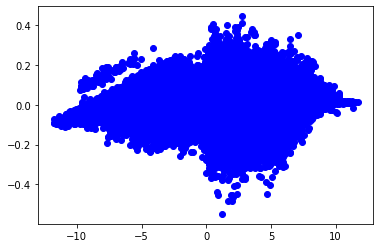

In [39]:
plt.plot(x, y, 'bo', label='exp')

In [41]:
from scipy.optimize import curve_fit
ppot, pcov = curve_fit(func, x, y)

In [42]:
ppot

array([0.00051053, 0.46315954])

In [43]:
0.00051053 + 0.46315954 *x 

array([-0.09317196,  0.02611692, -0.01510723, ...,  0.5403842 ,
        0.7350462 ,  0.33215562], dtype=float32)

In [45]:
(0.00051053 + 0.46315954 * train['feature_39']).corr(train['resp'])

0.04846098281254801